In [6]:
import sys 
sys.path.append('../utils')

import numpy as np 
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 1000
import matplotlib.pyplot as plt

from preprocess import gain

In [7]:
data = '/Users/jayanthboddu/Desktop/data_science/upgrad/MSDS/experiments_feb/data/stdata12/train_amplitude.npy'

train = np.load(data)
train.shape

display(np.mean(train), np.std(train), np.min(train), np.max(train))
vmin = np.min(train)
vmax = np.max(train)

-1.0966446

2520.2305

-28620.572

25043.0

In [8]:
patch_size = 256

In [9]:
patch = train[0,15:patch_size,15:patch_size].T
vmin = np.min(patch)
vmax = np.max(patch)
plt.imshow(patch, cmap='seismic', aspect='auto', vmin=vmin, vmax=vmax)
plt.axis('off')

8207.3701171875

NameError: name 'patch_agc' is not defined

8207.3701171875

-8207.37

8207.37

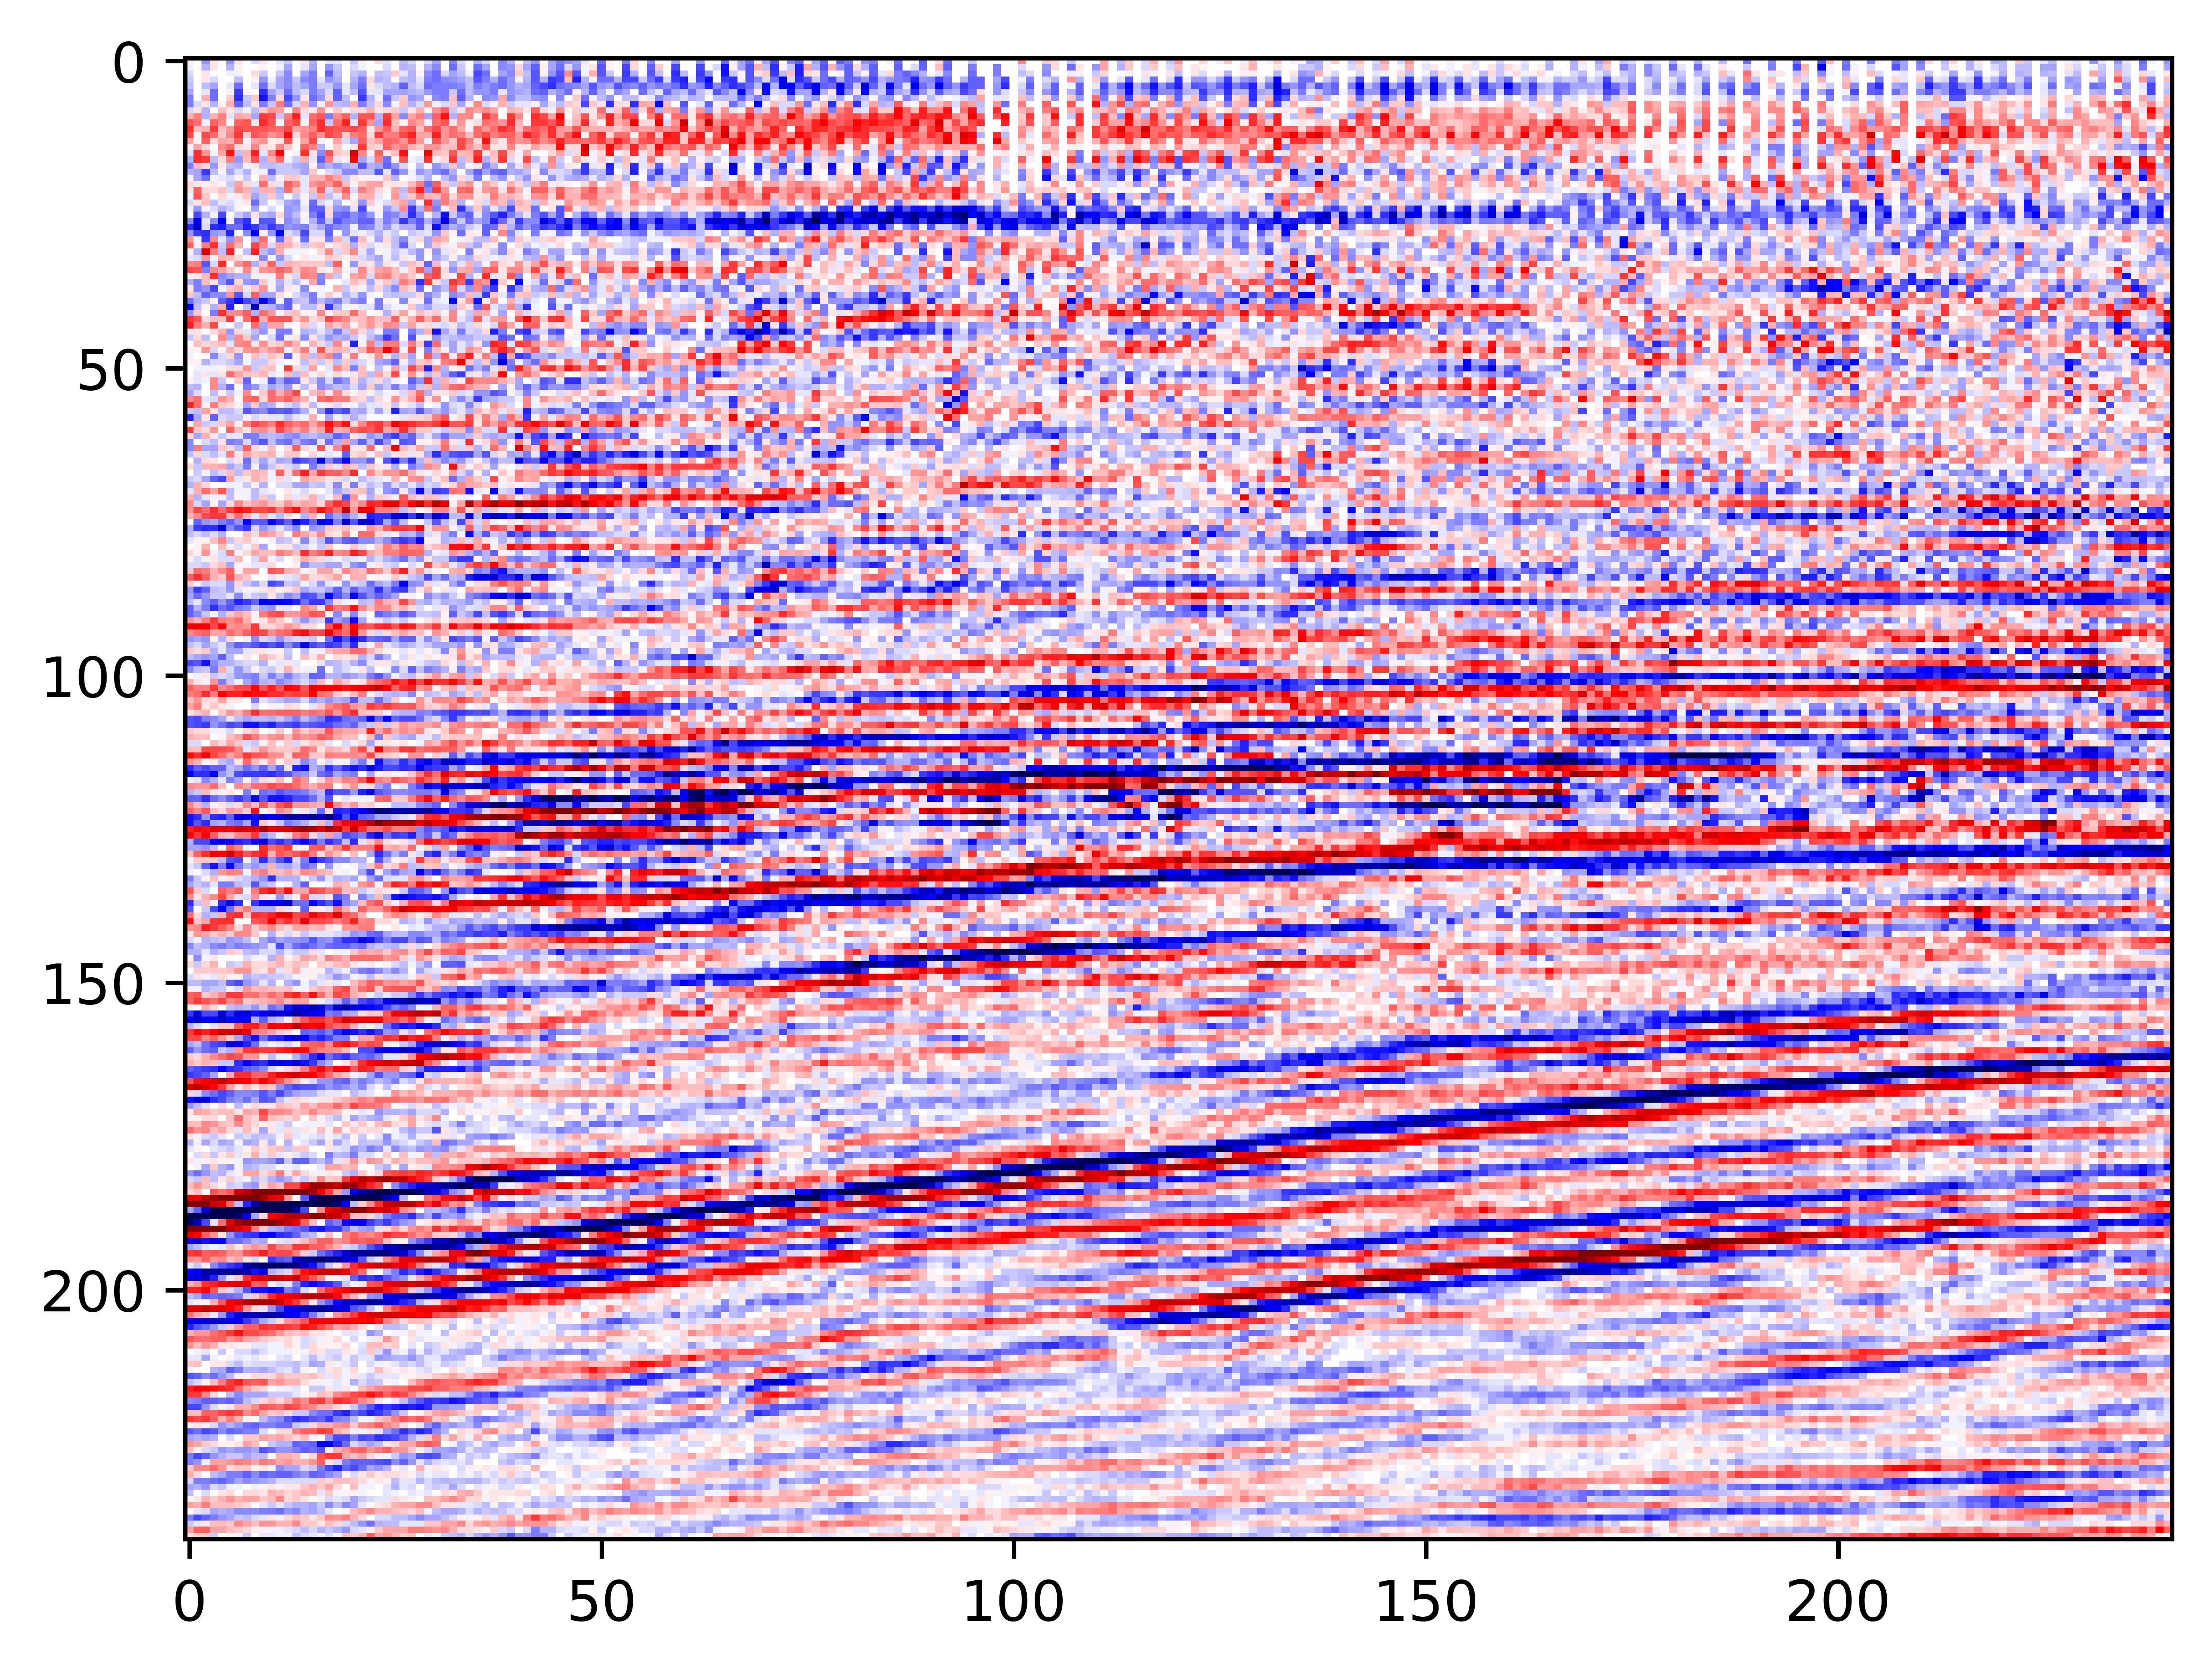

In [ ]:
abs_max = np.quantile(np.abs(train), 0.99)
display(abs_max)
patch_clip = np.clip(patch, -abs_max, abs_max) # remove outliers

vmin = np.min(patch_clip)
vmax = np.max(patch_clip)

plt.imshow(patch_clip, cmap='seismic', aspect='auto', vmin = vmin, vmax=vmax);
display(vmin, vmax)

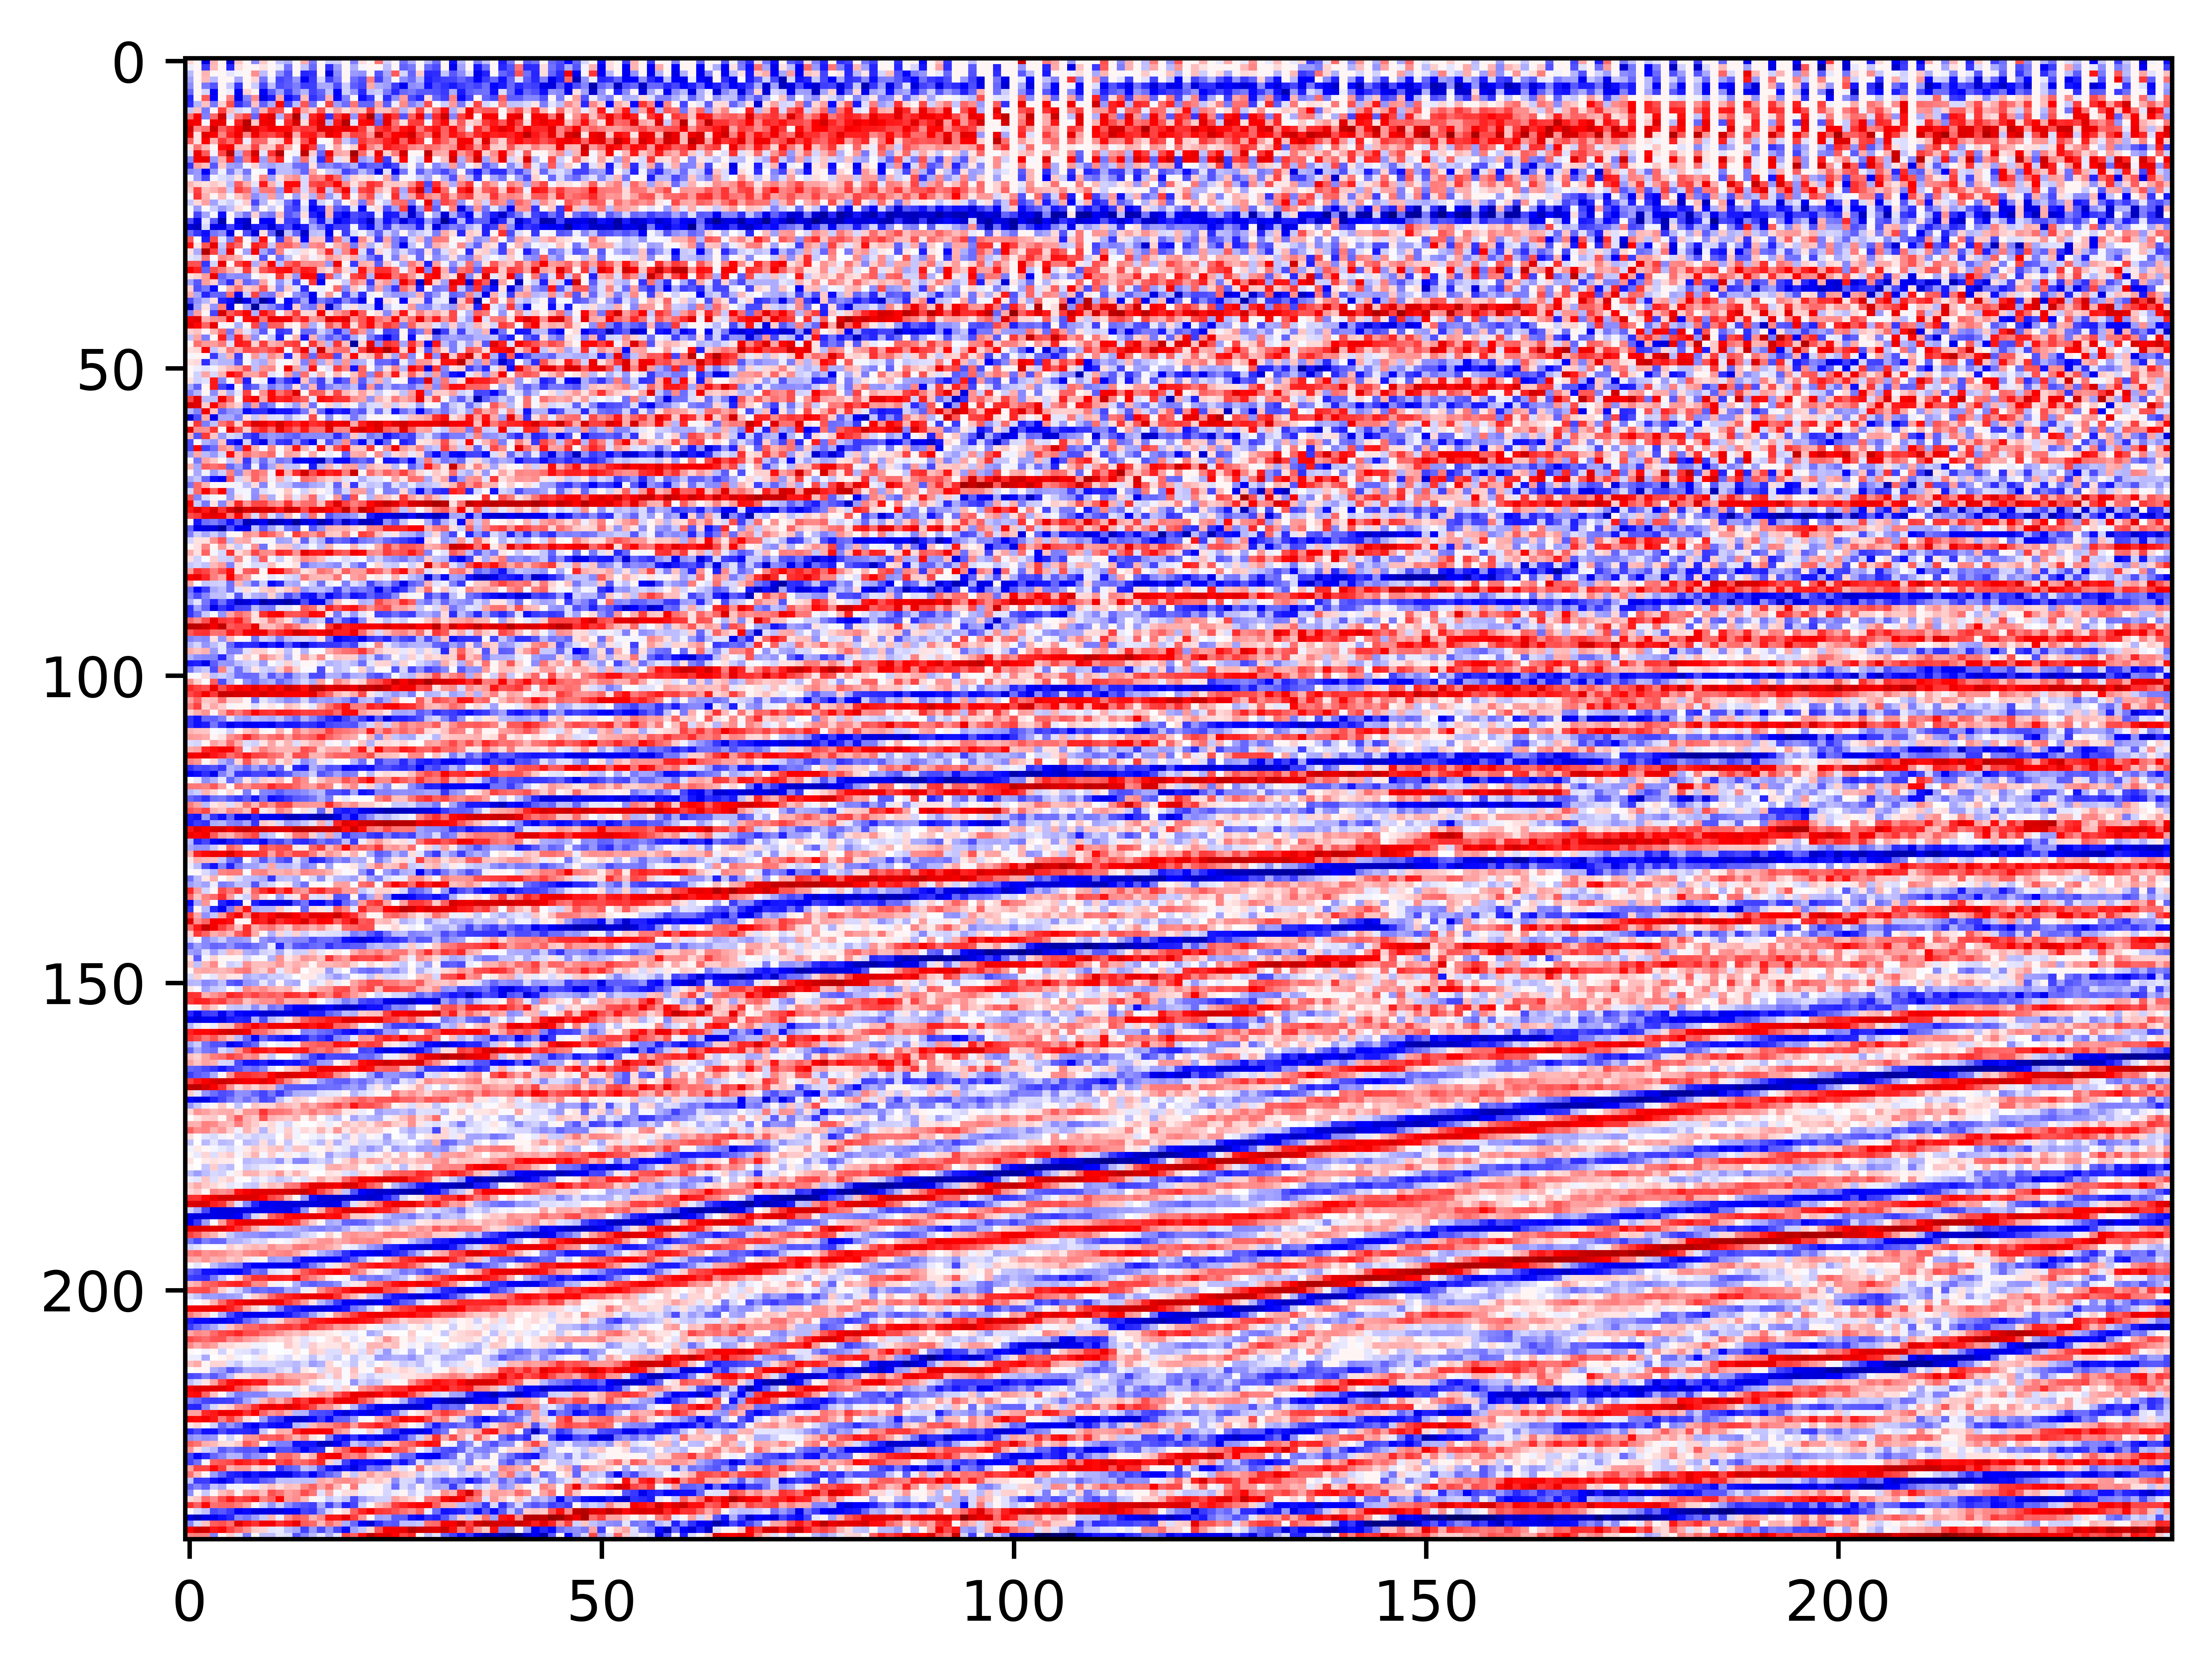

In [ ]:
patch_clip_agc = gain(patch_clip, 4e-3 , 'agc',(32)* (4e-3), 2)
vmin = np.min(patch_clip_agc)
vmax = np.max(patch_clip_agc)

plt.imshow(patch_clip_agc, cmap='seismic', aspect='auto', vmin=vmin, vmax=vmax);

In [ ]:
display(np.min(patch_clip_agc), np.max(patch_clip_agc), np.mean(patch_clip_agc), np.std(patch_clip_agc))

-3.3141925466670887

3.179157242424038

-0.0041572908006026164

0.9999913584292612

-1.0 0.9592554438700768


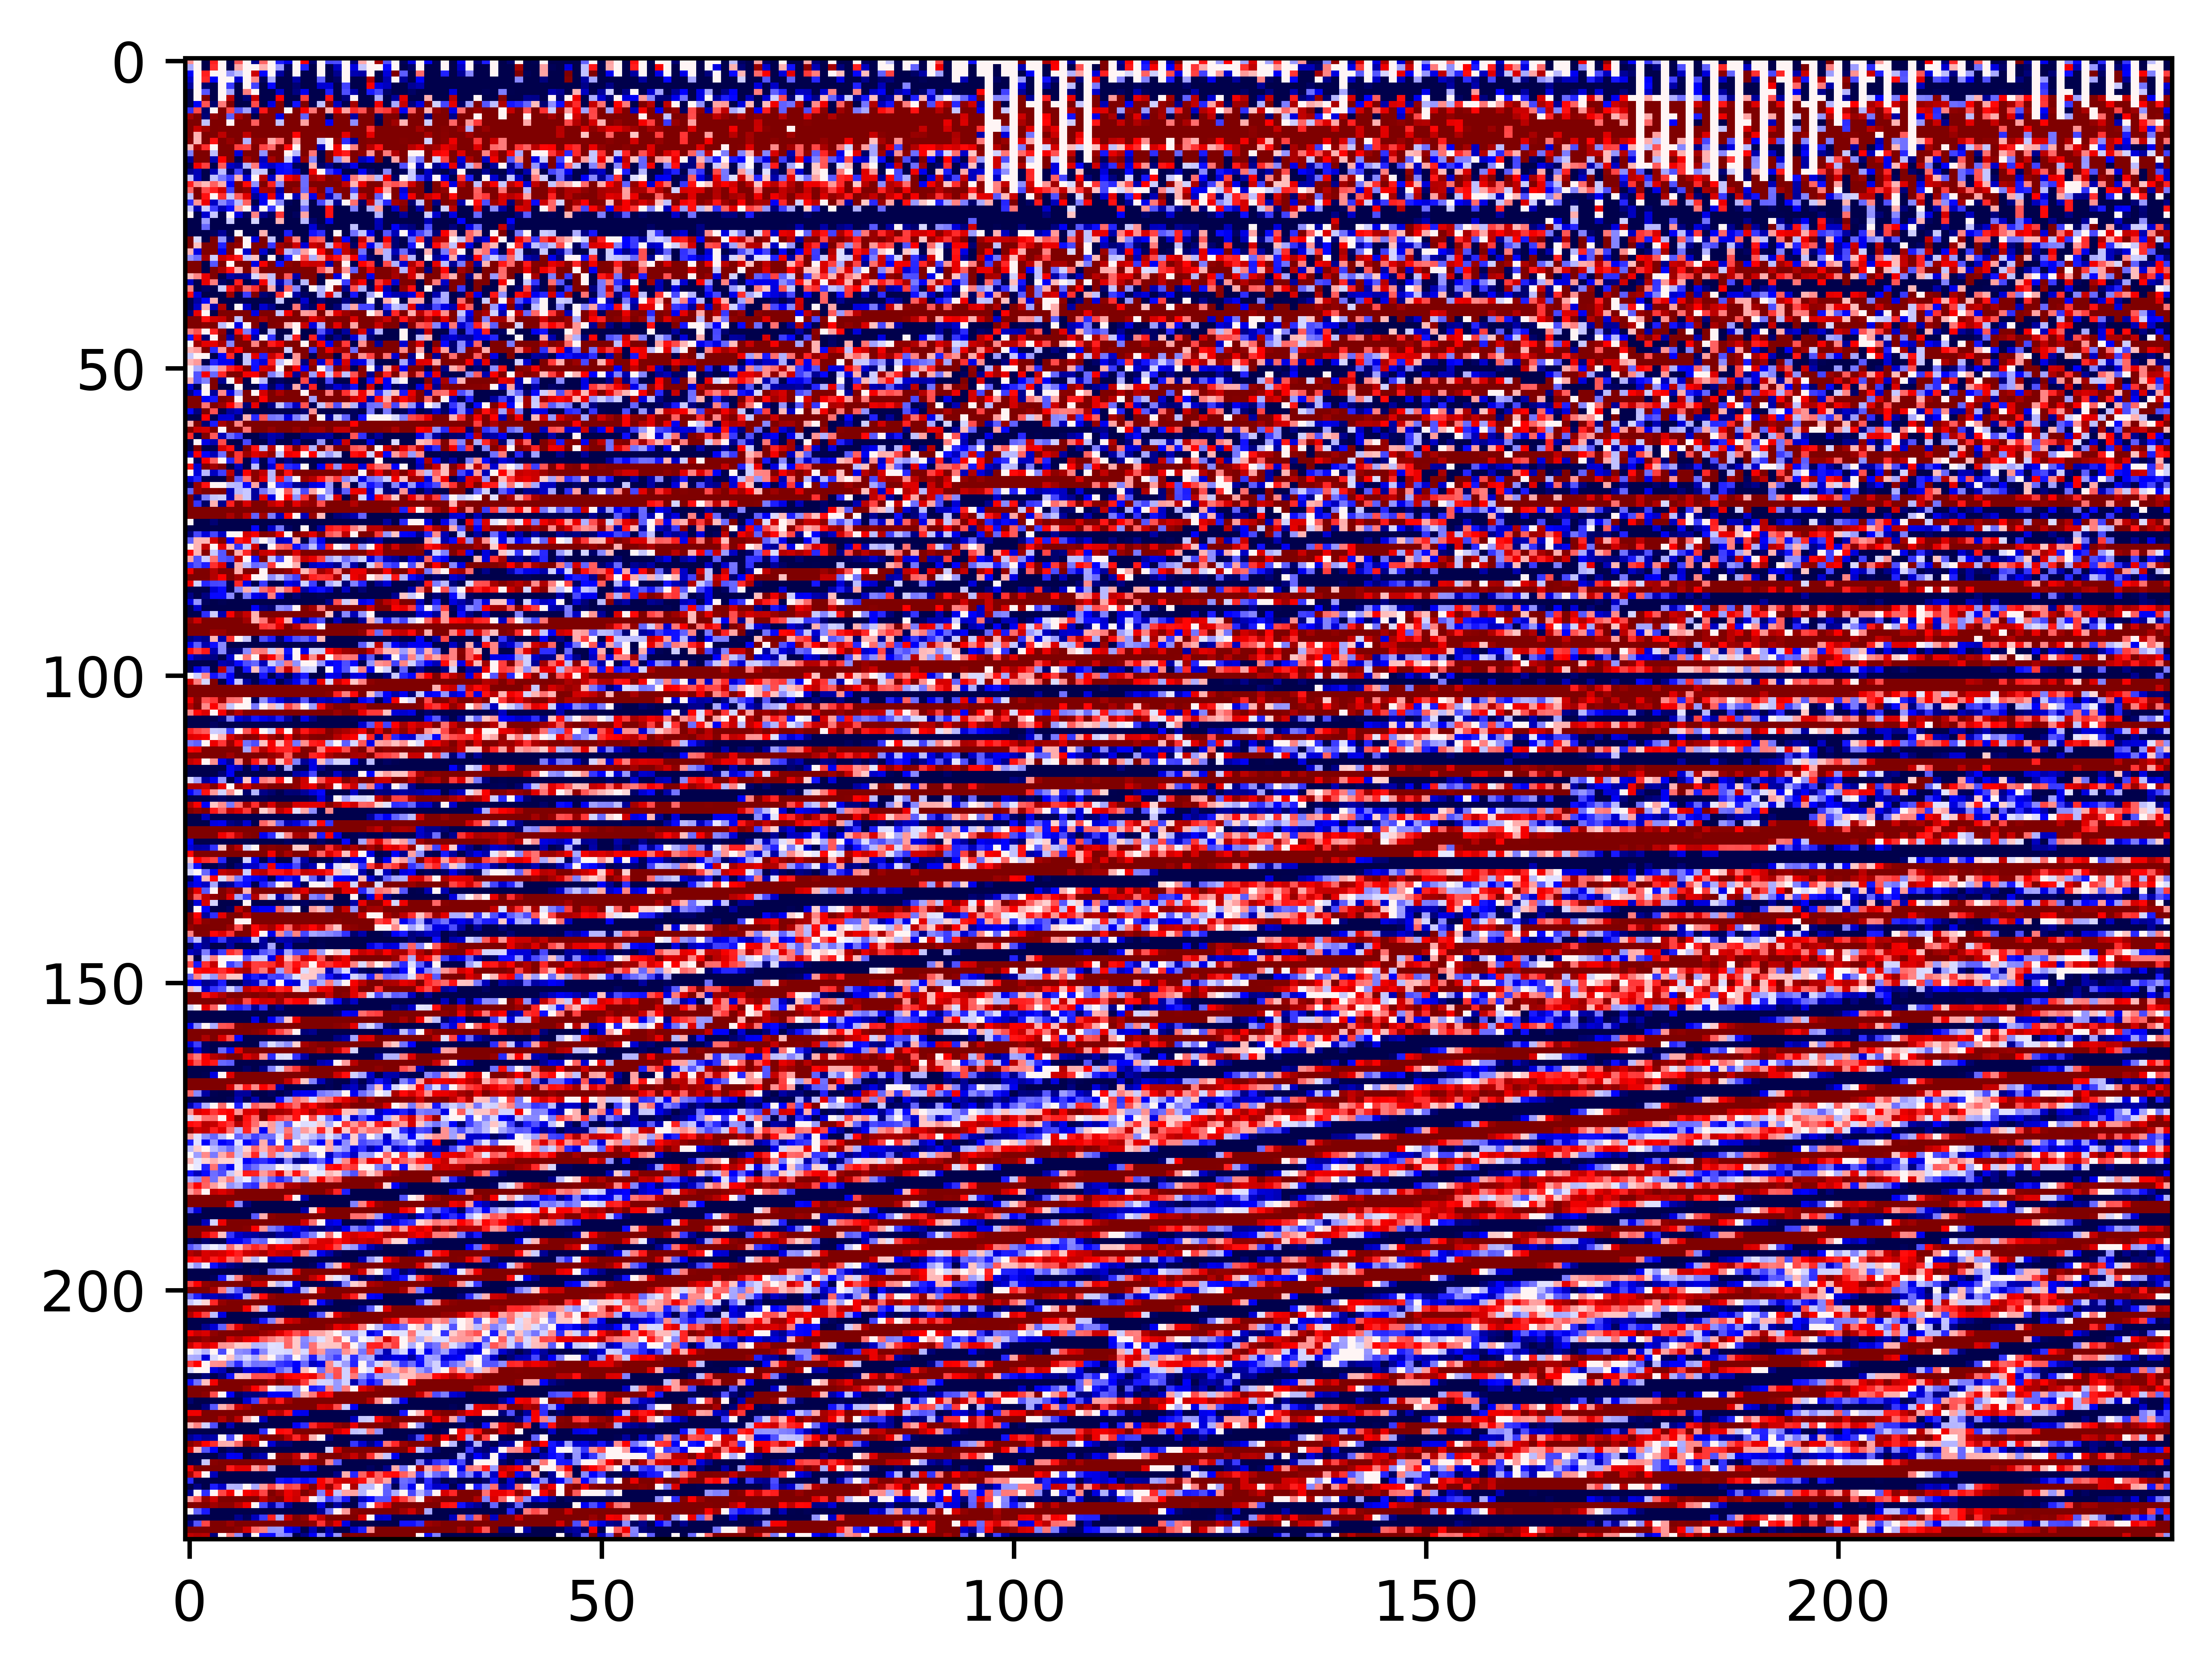

In [ ]:
patch_agc_norm_max = np.max(np.abs(patch_clip_agc))
patch_clip_agc_norm = patch_clip_agc/patch_agc_norm_max
vmin, vmax = np.min(patch_clip_agc_norm), np.max(patch_clip_agc_norm)
print(vmin, vmax)
plt.imshow(patch_clip_agc, cmap='seismic', aspect='auto', vmin=vmin, vmax=vmax);

In [ ]:
# wiggle plot 

from wiggle import wiggle

-9.688574340466888

8.932675013926564

## Creating a patch

(-0.5, 255.5, 240.5, -0.5)

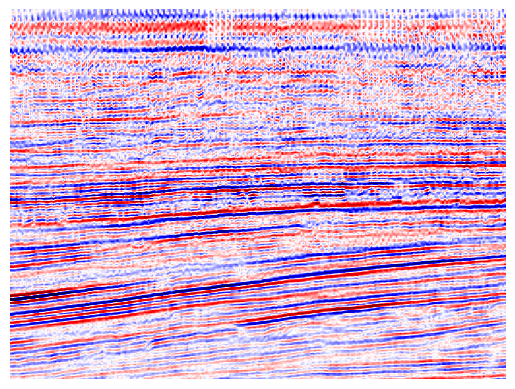

In [148]:


patch_size = 256

patch = train[0, 10 : 10 + 256, 15 : 256].T
vmin = np.min(patch)
vmax = np.max(patch)

plt.imshow(patch, cmap='seismic', aspect='auto', vmin=vmin_clip, vmax = vmax_clip)
plt.axis('off')

## Applying AGC

In [149]:
agc_windows = [patch_size / 2 , patch_size /  4 , patch_size / 8, patch_size/16, patch_size/32 ]

patch_agc = [gain(patch, 2e-3 , 'agc', window_size * (2e-3), 2) for window_size in agc_windows]

In [150]:
patch_agc[0].shape

(241, 256)

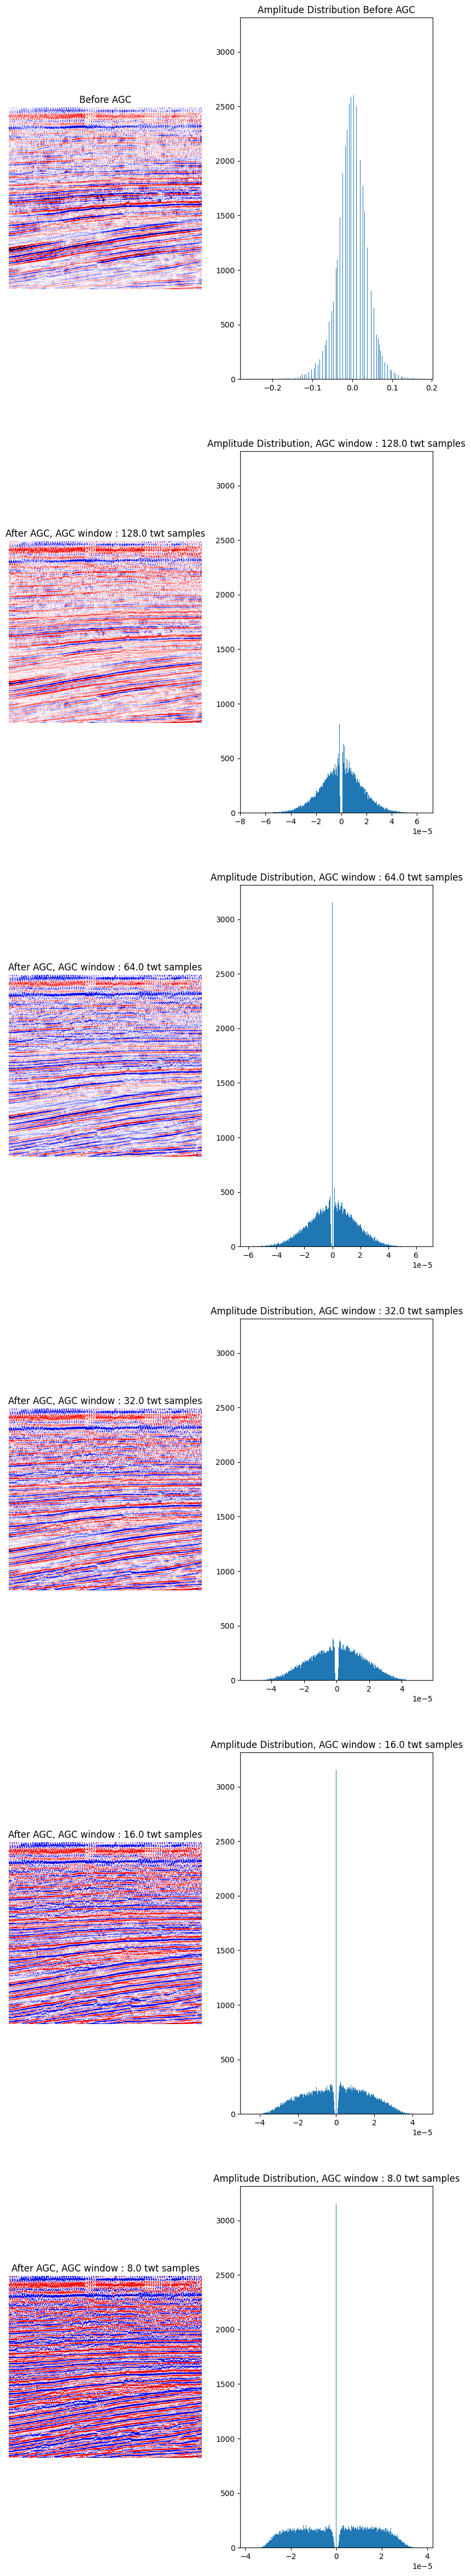

In [151]:
fig,ax = plt.subplots(nrows=len(agc_windows) + 1 , ncols= 2, figsize=(10, 10 * (len(agc_windows) + 1)) )

for i in range(len(agc_windows) + 1) : 
    if i==0 : 
        plot_kwargs = dict(
            vmin = vmin_clip, 
            vmax = vmax_clip, 
            cmap='seismic'
        )
        ax[i,0].imshow(patch, **plot_kwargs)
        ax[i,0].set_title('Before AGC')
        ax[i,0].axis('off')

        data = np.reshape(patch,-1)
        ax[i,1].hist(data / data.shape[0], bins=500);
        ax[i,1].set_title('Amplitude Distribution Before AGC')



    else : 
        vmin = np.min(patch_agc[i-1])
        vmax = np.max(patch_agc[i-1])

        plot_kwargs = dict(
                vmin = vmin, 
                vmax = vmax, 
                cmap='seismic'
            )

        ax[i,0].imshow(patch_agc[i-1], **plot_kwargs)
        ax[i,0].set_title(f'After AGC, AGC window : {agc_windows[i-1]} twt samples')
        ax[i,0].axis('off')

        data = np.reshape(patch_agc[i-1],-1)
        ax[i,1].hist(data / data.shape[0], bins=500);
        ax[i,1].set_title(f'Amplitude Distribution, AGC window : {agc_windows[i-1]} twt samples')

In [152]:
# Selecting agc window of 64 twt samples 

patch_agc_64 = patch_agc[1]

display(np.min(patch_agc_64), np.max(patch_agc_64))

-3.6774373019648814

4.053679648158852

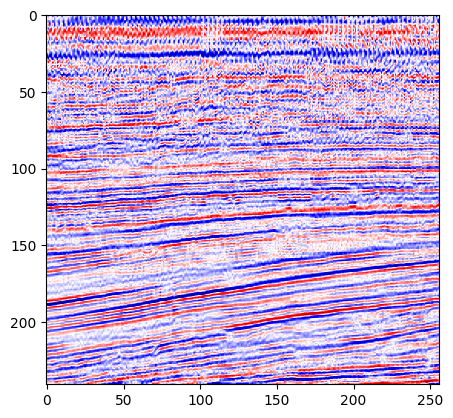

In [153]:
# Min max scaling to [-1,1]
scaler = np.max(np.abs(patch_agc_64))
patch_agc_64_scaled = patch_agc_64 / scaler

plot_kwargs = dict(
                vmin = np.min(patch_agc_64_scaled), 
                vmax = np.max(patch_agc_64_scaled), 
                cmap='seismic'
            )


plt.imshow(patch_agc_64_scaled, **plot_kwargs)

61696

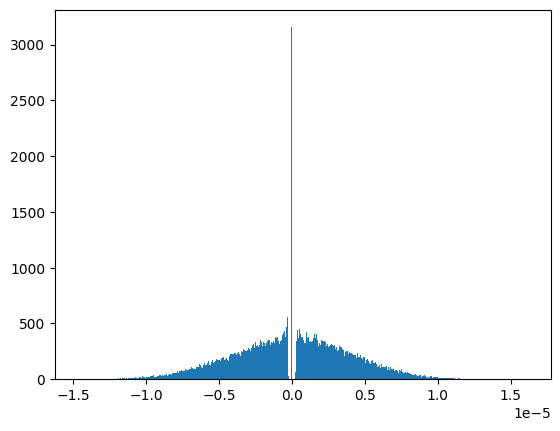

In [154]:
# plotting distribution of amplitudes 
data = np.reshape(patch_agc_64_scaled,-1)

display(data.shape[0])

plt.hist(data / data.shape[0], bins=500);